In [2]:
%matplotlib widget
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def imshow(frame, dpi=160):
  im_data = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
  height, width, depth = im_data.shape

  # What size does the figure need to be in inches to fit the image?
  figsize = width / float(dpi), height / float(dpi)

  # Create a figure of the right size with one axes that takes up the full figure
  fig = plt.figure(figsize=figsize)
  ax = fig.add_axes([0, 0, 1, 1])

  # Hide spines, ticks, etc.
  ax.axis('off')

  # Display the image.
  ax.imshow(im_data, cmap='gray')

  plt.show()

In [16]:
circle = np.array([np.cos(np.arange(0, 2*np.pi, 2*np.pi/100)), np.sin(np.arange(0, 2*np.pi, 2*np.pi/100))])
circle = circle.swapaxes(0, 1)

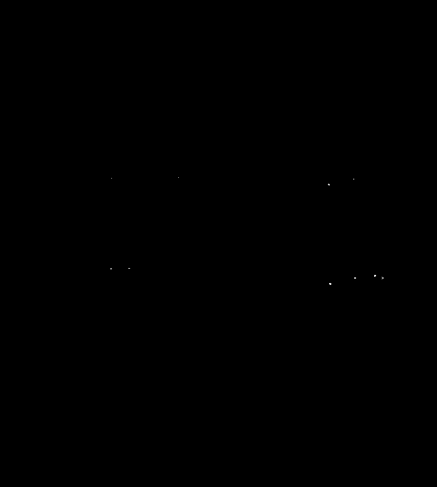

NameError: name 'circle' is not defined

In [15]:
frame = cv.imread('data/labeled/fish_ring/2022-08-14T18:10:17.418415.png')
img = frame[220:1000,400:1100]
img = cv.inRange(img, (200, 200, 200), (255, 255, 255))
img[300:430,:] = 0
imshow(img)

# cv.HoughCircles(img, cv.HOUGH_GRADIENT_ALT, 1.5, 300)

contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
if not contours:
  print('not contours')
contours = sorted(contours,
                  key=lambda c: cv.arcLength(c, True),
                  reverse=True)[:5]
contours = sorted(
    contours, key=lambda c: cv.matchShapes(circle, c, cv.CONTOURS_MATCH_I1, 0))
for best in contours:
  if len(best) < 10:
    continue
  #
  # center, radius = cv.minEnclosingCircle(best)
  # if center_distance < 30:
  #   cv.circle(frame, (np.intp(center) + (400, 220)), int(radius), (255, 0, 0), 2)
  #   print(radius)
  #
  ellipse = cv.fitEllipse(best)
  center, size, angle = ellipse
  center_distance = cv.norm(np.array(center) - (372, 366))
  if center_distance < 30 and abs(size[0] - size[1]) < 30:
    print(center)
    print(min(size[0], size[1]))
    cv.ellipse(frame, (np.array(center) + (400, 220), size, angle),
               (255, 0, 0), 2)
else:
  print('no_good_result')

imshow(frame)

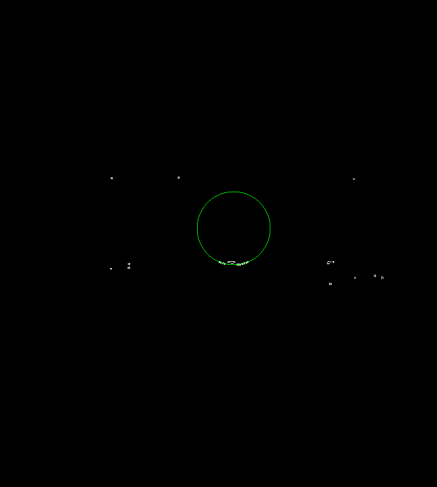

In [17]:
frame = cv.imread('data/labeled/fish_ring/2022-08-14T18:10:17.418415.png')
img = frame[220:1000,400:1100]
img = cv.inRange(img, (200, 200, 200), (255, 255, 255))
img[290:420,:] = 0
img = cv.Canny(img, 50, 200, None, 3)
# imshow(img)

center = (373.1545715332031, 366.3962707519531)
# a = np.histogram(np.where(np.any(img > 0, axis)) - center)
distance = np.linalg.norm(np.transpose(np.nonzero(img > 0)) - center, axis=1)
radius = np.mean(np.sort(distance, axis=None)[:distance.size // 2])
imshow(cv.circle(cv.cvtColor(img, cv.COLOR_GRAY2RGB), np.intp(center), int(radius), (0, 255, 0)))

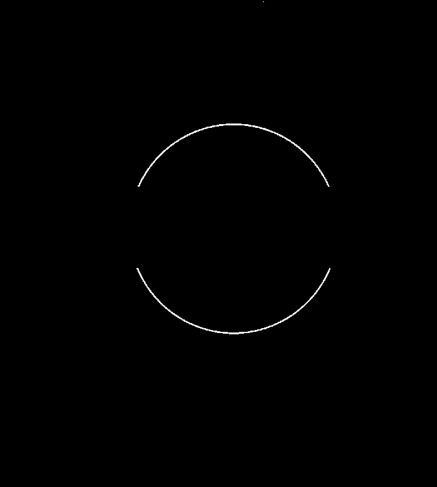

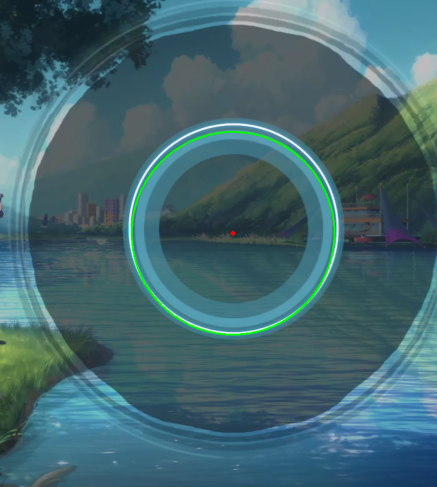

In [19]:
frame = cv.imread('data/raw/2022-08-14T02:35:11.639895.png')
frame = frame[220:1000,400:1100]
img = cv.inRange(frame, (200, 200, 200), (255, 255, 255))
img[300:430,:] = 0
imshow(img)

circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20, param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(frame,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(frame,(i[0],i[1]),2,(0,0,255),3)
imshow(frame)

[[400, 220], [1100, 1000]]


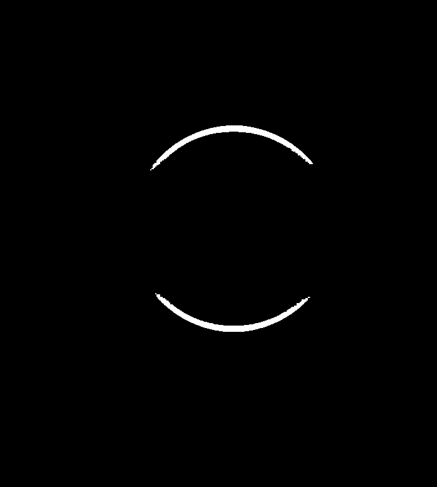

707.4813842773438
522.896728515625
no_good_result


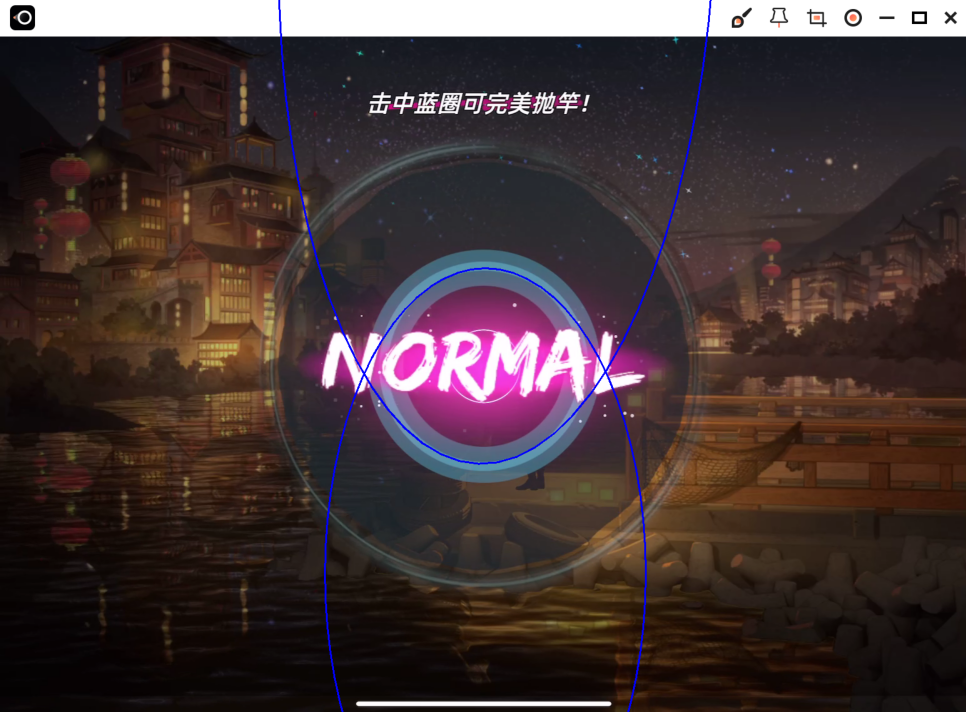

In [24]:
region = [[400, 220], [1100, 1000]]
print(region)
frame = cv.imread('data/labeled/fish_ring/2022-08-14T18:10:17.418415.png')
img = frame[region[0][1]:region[1][1], region[0][0]:region[1][0]]
filter_color = np.array((176, 158, 83))

img = cv.inRange(img, filter_color - 30, filter_color + 30)
kernel = np.ones((5,5),np.uint8)
img = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
# kernel = np.ones((8,8),np.uint8)
img = cv.erode(img,kernel,iterations = 1)
# img[300:430,:] = 0
imshow(img)

# circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,200, param1=50,param2=30,minRadius=200,maxRadius=400)

# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     cv.circle(frame,(i[0],i[1]),i[2],(0,255,0),2)
#     # draw the center of the circle
#     cv.circle(frame,(i[0],i[1]),2,(0,0,255),3)
# imshow(frame)

contours, _ = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
if not contours:
  print('not contours')
contours = sorted(contours,
                  key=lambda c: cv.arcLength(c, True),
                  reverse=True)[:5]
contours = sorted(
    contours, key=lambda c: cv.matchShapes(circle, c, cv.CONTOURS_MATCH_I1, 0))
for best in contours:
  if len(best) < 10:
    continue
  #
  # center, radius = cv.minEnclosingCircle(best)
  # if center_distance < 30:
  #   cv.circle(frame, (np.intp(center) + (400, 220)), int(radius), (255, 0, 0), 2)
  #   print(radius)
  #
  ellipse = cv.fitEllipse(best)
  center, size, angle = ellipse
  # center_distance = cv.norm(np.array(center) - (372, 366))
  # if center_distance < 30 and abs(size[0] - size[1]) < 30:
  #   print(min(size[0], size[1]))
  # cv.ellipse(frame, (np.array(center) + region[0], np.array(size) - 10, angle),
  #             (255, 0, 0), 2)
  if abs(center[0] - 372) < 30:
    print(min(size[0], size[1]))
    cv.ellipse(frame,
               (np.array(center) + region[0], np.array(size) - 10, angle),
               (255, 0, 0), 2)
else:
  print('no_good_result')

imshow(frame)